# Decision Trees and Random Forest

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('data/variables.csv')

X = df.drop('maximum_range',axis=1)
y = df['maximum_range']

## Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Create an instance of DecisionTreeRegressor() called dtree and fit it to the training data.**

In [8]:
dtree = DecisionTreeRegressor()

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [24]:
text_representation = export_text(dtree)
print(text_representation)

|--- feature_0 <= 20371.16
|   |--- feature_4 <= -112.73
|   |   |--- feature_5 <= -5.95
|   |   |   |--- feature_3 <= 452.50
|   |   |   |   |--- feature_2 <= 24545.26
|   |   |   |   |   |--- value: [11.48]
|   |   |   |   |--- feature_2 >  24545.26
|   |   |   |   |   |--- value: [8.98]
|   |   |   |--- feature_3 >  452.50
|   |   |   |   |--- feature_0 <= 7114.80
|   |   |   |   |   |--- feature_4 <= -144.71
|   |   |   |   |   |   |--- value: [2.27]
|   |   |   |   |   |--- feature_4 >  -144.71
|   |   |   |   |   |   |--- value: [0.08]
|   |   |   |   |--- feature_0 >  7114.80
|   |   |   |   |   |--- value: [4.77]
|   |   |--- feature_5 >  -5.95
|   |   |   |--- feature_0 <= 9462.96
|   |   |   |   |--- feature_1 <= 482.52
|   |   |   |   |   |--- feature_0 <= 7096.09
|   |   |   |   |   |   |--- value: [9.61]
|   |   |   |   |   |--- feature_0 >  7096.09
|   |   |   |   |   |   |--- value: [3.05]
|   |   |   |   |--- feature_1 >  482.52
|   |   |   |   |   |--- value: [25.39]
|

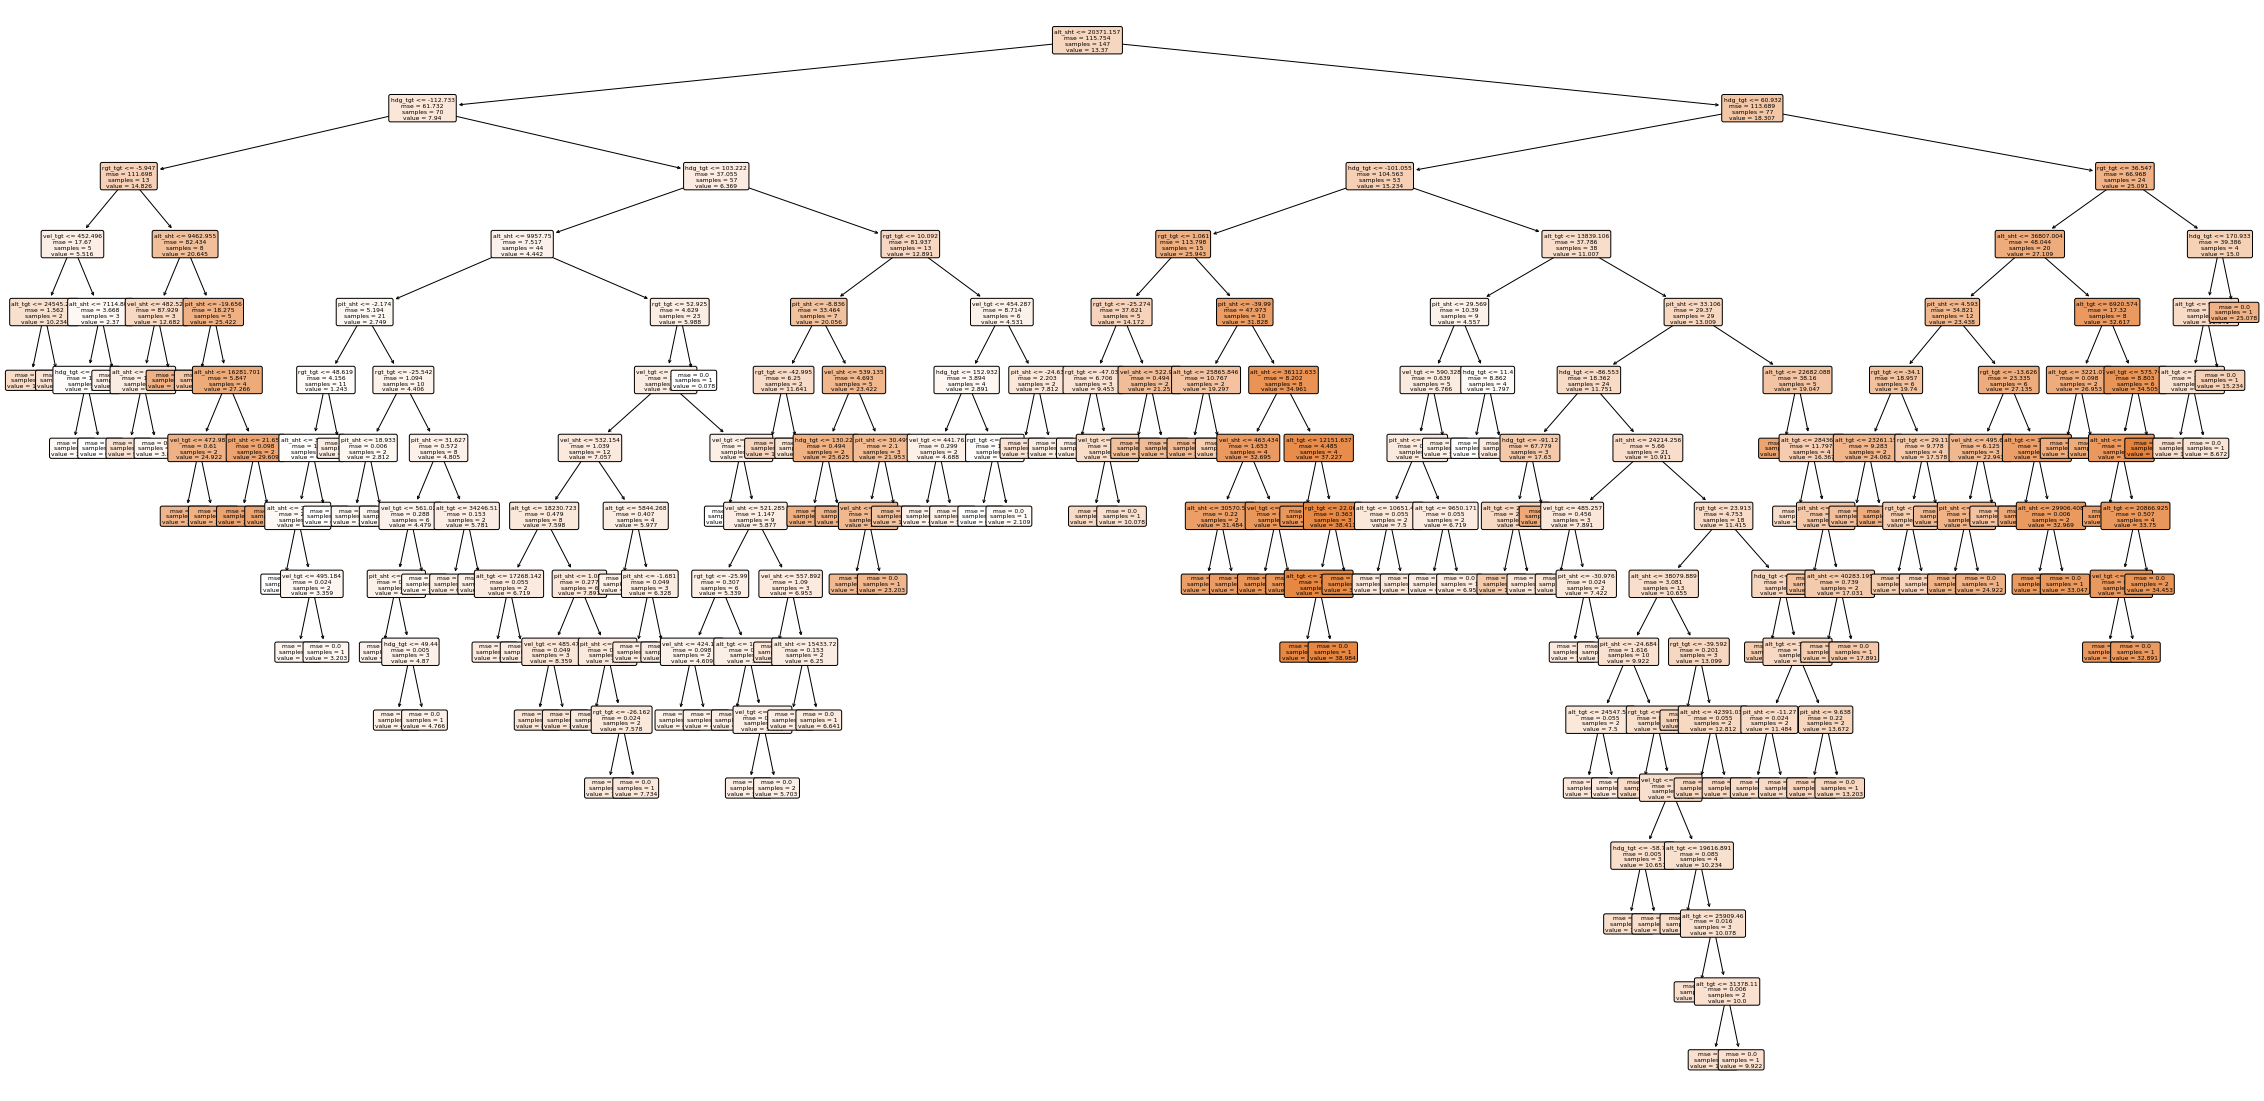

In [45]:
plt.figure(figsize=(40,20))  
_ = plot_tree(dtree, feature_names = X.columns, filled=True, fontsize=6, rounded = True)
plt.savefig('models/decisiontree_model.png')

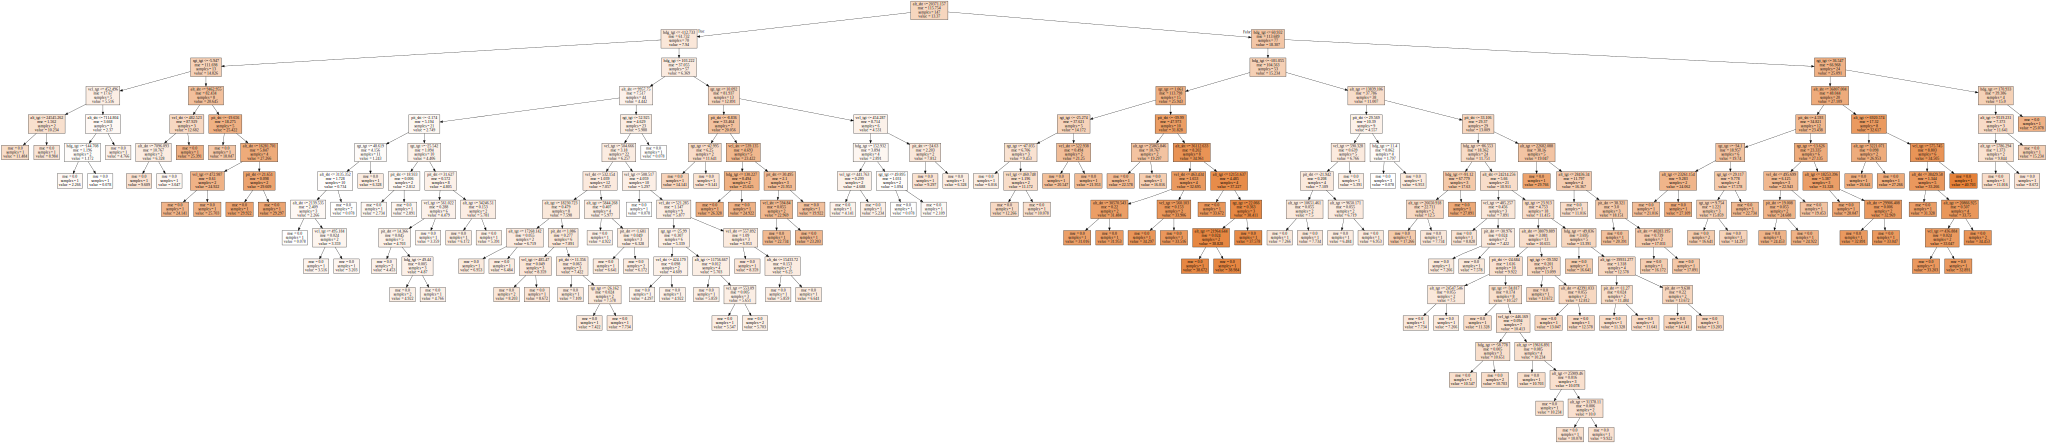

In [38]:
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, filled=True)
graphviz.Source(dot_data, format="png")


## Predictions and Evaluation of Decision Tree

In [31]:
predictions = dtree.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

# Calculate the Explained Variance Score
print("Explained Variance Score: {:.3f}".format(explained_variance_score(predictions,y_test)))
# Calculate the R2
print("R2: {:.3f}".format(r2_score(predictions,y_test)))
# Calculate the Mean Abosolute Error
print("MAE: {:.3f}".format(mean_absolute_error(y_test,predictions)))
# Calculate the Mean Squared Error
print("MSE: {:.3f}".format(mean_squared_error(y_test,predictions)))
# Calculate the Root Mean Squared Error
print("RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y_test,predictions))))

Explained Variance Score: 0.282
R2: 0.278
MAE: 5.699
MSE: 66.865
RMSE: 8.177


## Training the Random Forest model

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [34]:
rfc = RandomForestRegressor(n_estimators=600)

In [35]:
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600)

## Predictions and Evaluation

In [36]:
predictions = rfc.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score

# Calculate the Explained Variance Score
print("Explained Variance Score: {:.3f}".format(explained_variance_score(predictions,y_test)))
# Calculate the R2
print("R2: {:.3f}".format(r2_score(predictions,y_test)))
# Calculate the Mean Abosolute Error
print("MAE: {:.3f}".format(mean_absolute_error(y_test,predictions)))
# Calculate the Mean Squared Error
print("MSE: {:.3f}".format(mean_squared_error(y_test,predictions)))
# Calculate the Root Mean Squared Error
print("RMSE: {:.3f}".format(np.sqrt(mean_squared_error(y_test,predictions))))

Explained Variance Score: 0.443
R2: 0.420
MAE: 4.310
MSE: 29.242
RMSE: 5.408
